<a href="https://colab.research.google.com/github/MMENDONNCA/House-Prices-Prediction/blob/main/Previs%C3%A3o_Do_Valor_De_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices - Advanced Regression Techniques** 🏚️

# **Pré Processamento Dos Dados** 🎲





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


base = pd.read_csv('train.csv')
print(f"Formato inicial do DataFrame: {base.shape}")
print("-" * 50)


print("Iniciando tratamento inteligente de valores nulos...")

# 1a. Tratar 'LotFrontage' com a mediana do bairro (antes de qualquer eliminação)
base['LotFrontage'] = base.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# 1b. Tratar nulos categóricos onde 'NaN' significa 'ausência' de uma característica
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']:

    if col in base.columns:
        base[col] = base[col].fillna('None')

# 1c. Tratar nulos numéricos relacionados às categóricas acima
base['MasVnrArea'] = base['MasVnrArea'].fillna(0)
base['GarageYrBlt'] = base['GarageYrBlt'].fillna(0)

# 1d. Tratar nulos restantes que são provavelmente erros de digitação
base['Electrical'] = base['Electrical'].fillna(base['Electrical'].mode()[0])

# Verificação Final da Limpeza
nulos_finais = base.isnull().sum().sum()
print(f"Total de valores nulos restantes: {nulos_finais}")
if nulos_finais == 0:
    print("Limpeza de dados concluída com sucesso!")
print("-" * 50)





Formato inicial do DataFrame: (1460, 81)
--------------------------------------------------
Iniciando tratamento inteligente de valores nulos...
Total de valores nulos restantes: 0
Limpeza de dados concluída com sucesso!
--------------------------------------------------


# **Análise Exploratória Dos Dados**🔍

Analisando a distribuição do SalePrice...


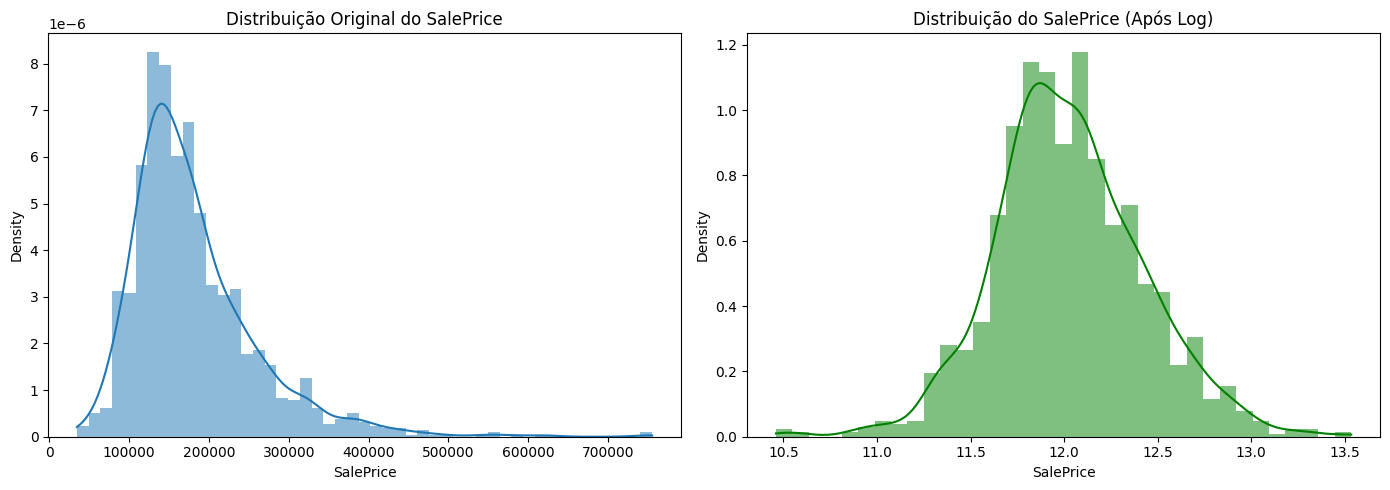


Analisando a relação entre Bairro (Neighborhood) e Preço...


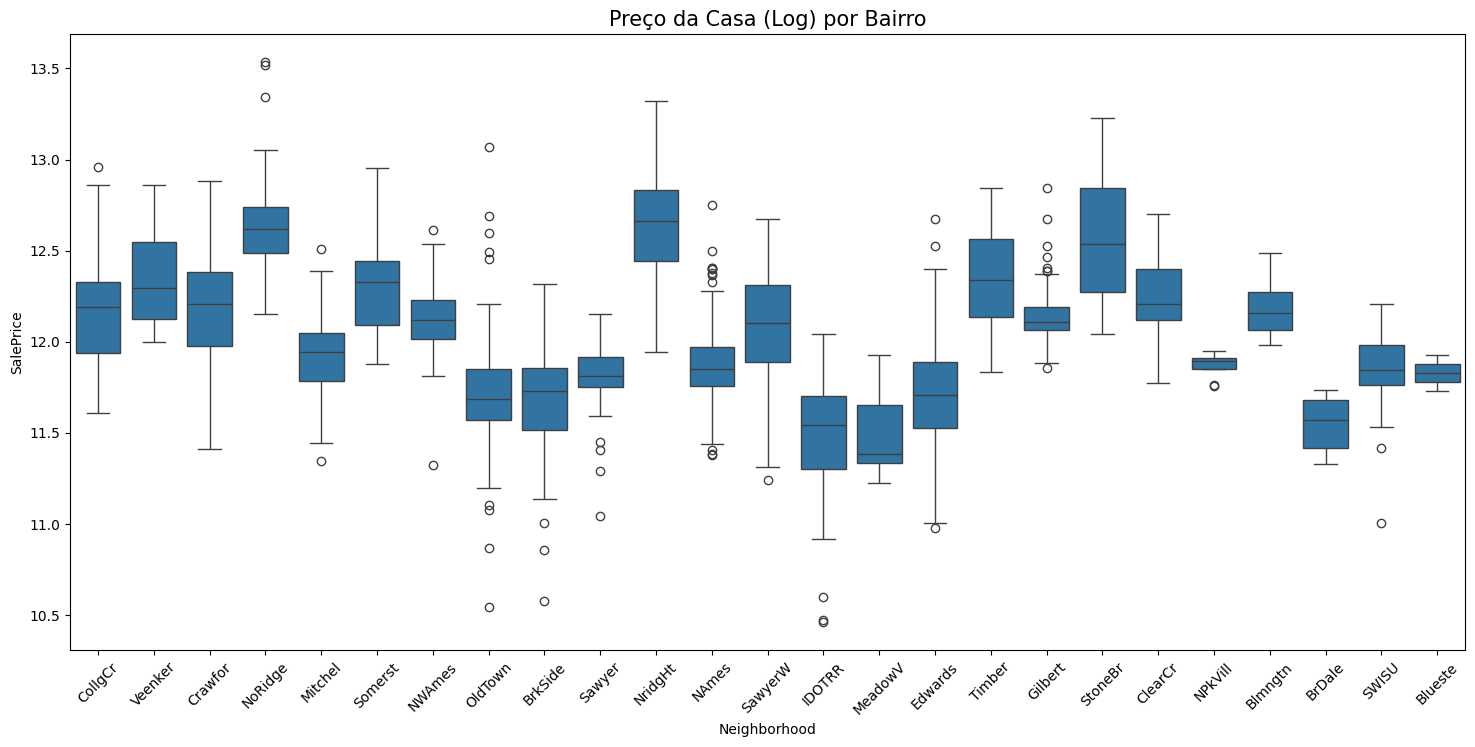


Analisando a relação entre Área (GrLivArea) e Preço...


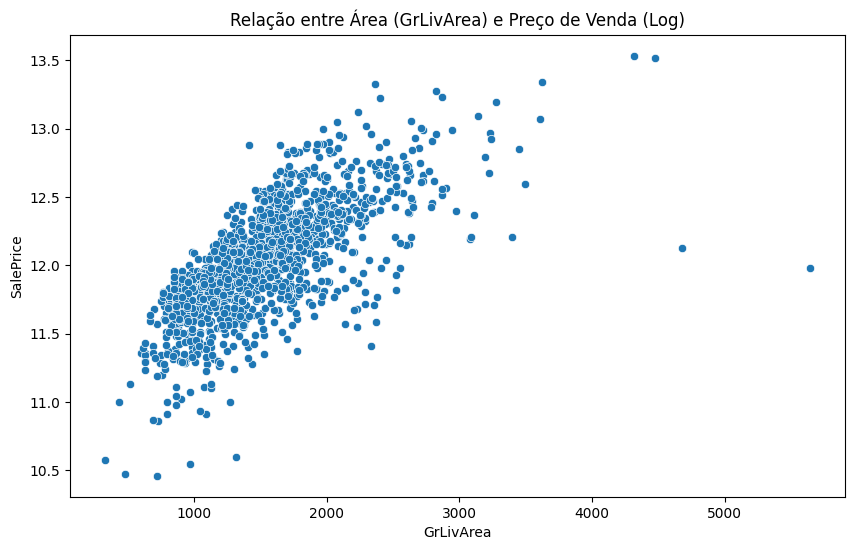


Gerando Heatmap de Correlação...


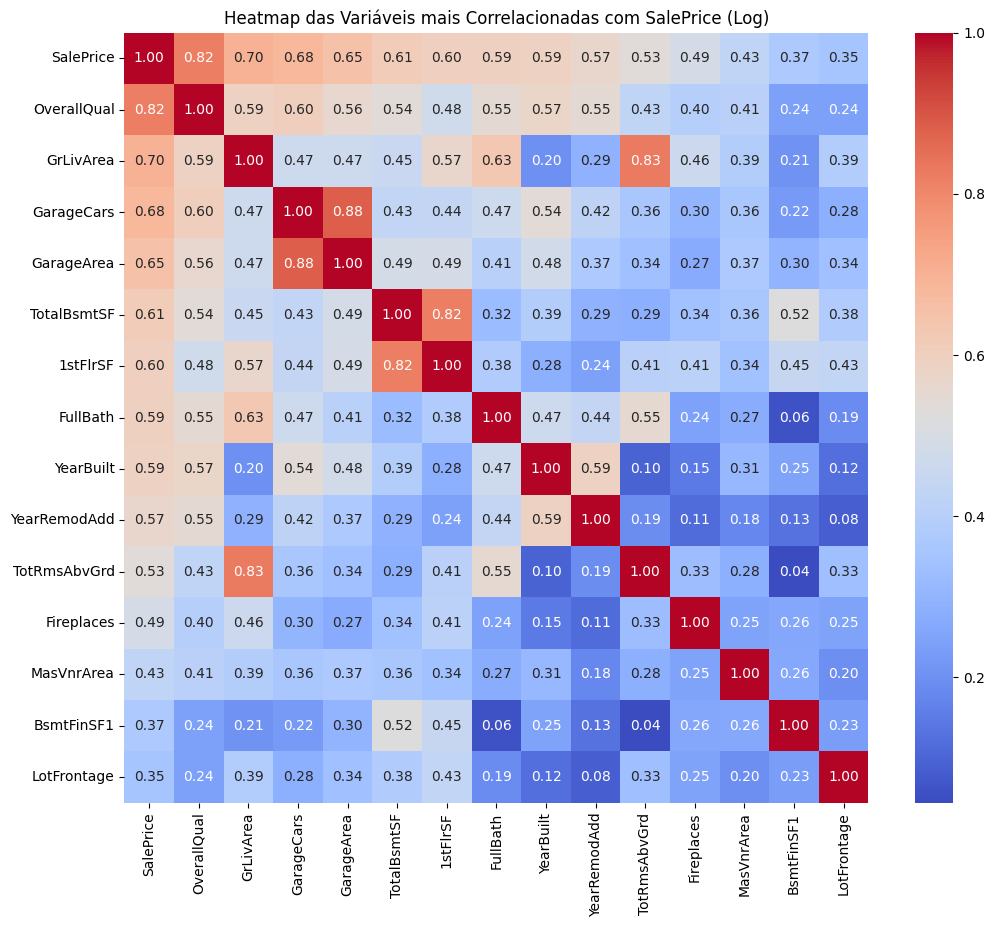

In [ ]:
# 2a. Analisando a Variável Alvo (SalePrice)
print("Analisando a distribuição do SalePrice...")
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(base['SalePrice'], kde=True, stat="density", linewidth=0)
plt.title('Distribuição Original do SalePrice')

# Aplicando transformação de log para normalizar
base['SalePrice'] = np.log1p(base['SalePrice'])

plt.subplot(1, 2, 2)
sns.histplot(base['SalePrice'], kde=True, stat="density", linewidth=0, color='green')
plt.title('Distribuição do SalePrice (Após Log)')
plt.tight_layout()
plt.show()


# 2b. Analisando Variáveis Categóricas Importantes
print("\nAnalisando a relação entre Bairro (Neighborhood) e Preço...")
plt.figure(figsize=(18, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=base)
plt.title('Preço da Casa (Log) por Bairro', fontsize=15)
plt.xticks(rotation=45)
plt.show()


# 2c. Relação entre Variáveis Numéricas e o Preço
print("\nAnalisando a relação entre Área (GrLivArea) e Preço...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=base)
plt.title('Relação entre Área (GrLivArea) e Preço de Venda (Log)')
plt.show()


# 2d. Mapa de Calor das Correlações
print("\nGerando Heatmap de Correlação...")
df_numeric = base.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()
top_corr_features = correlation_matrix.nlargest(15, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap das Variáveis mais Correlacionadas com SalePrice (Log)')
plt.show()

# **Feature Engineering**  🛠️

In [ ]:

print("Iniciando Engenharia de Features...")

# Criando feature para a idade da casa
base['HouseAge'] = base['YrSold'] - base['YearBuilt']

# Criando feature para os anos desde a remodelação
base['YearsSinceRemod'] = base['YrSold'] - base['YearRemodAdd']

# Criando feature para a área total da casa
base['TotalSF'] = base['TotalBsmtSF'] + base['1stFlrSF'] + base['2ndFlrSF']

# Criando feature para o número total de banheiros
base['TotalBath'] = base['FullBath'] + 0.5 * base['HalfBath'] + base['BsmtFullBath'] + 0.5 * base['BsmtHalfBath']

print("Novas features criadas: 'HouseAge', 'YearsSinceRemod', 'TotalSF', 'TotalBath'")
print("-" * 50)

# Separando a variável alvo (y) das features (X)
# Lembre-se que já aplicamos o log em 'SalePrice'
y = base['SalePrice']
X = base.drop(['SalePrice', 'Id'], axis=1) # Removemos SalePrice e o Id que não é útil

# Aplicando One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X)

print(f"Formato do DataFrame de features (X) após One-Hot Encoding: {X.shape}")
print("O DataFrame agora contém apenas números e está pronto para a modelagem.")
print("-" * 50)

print("Visualização do DataFrame X final:")
X.head()


Iniciando Engenharia de Features...
Novas features criadas: 'HouseAge', 'YearsSinceRemod', 'TotalSF', 'TotalBath'
--------------------------------------------------
Formato do DataFrame de features (X) após One-Hot Encoding: (1460, 306)
O DataFrame agora contém apenas números e está pronto para a modelagem.
--------------------------------------------------
Visualização do DataFrame X final:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


# **Criando o Modelo** 📐

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.863e+00, tolerance: 1.781e-02
  model = cd_fast.enet_coordinate_descent(


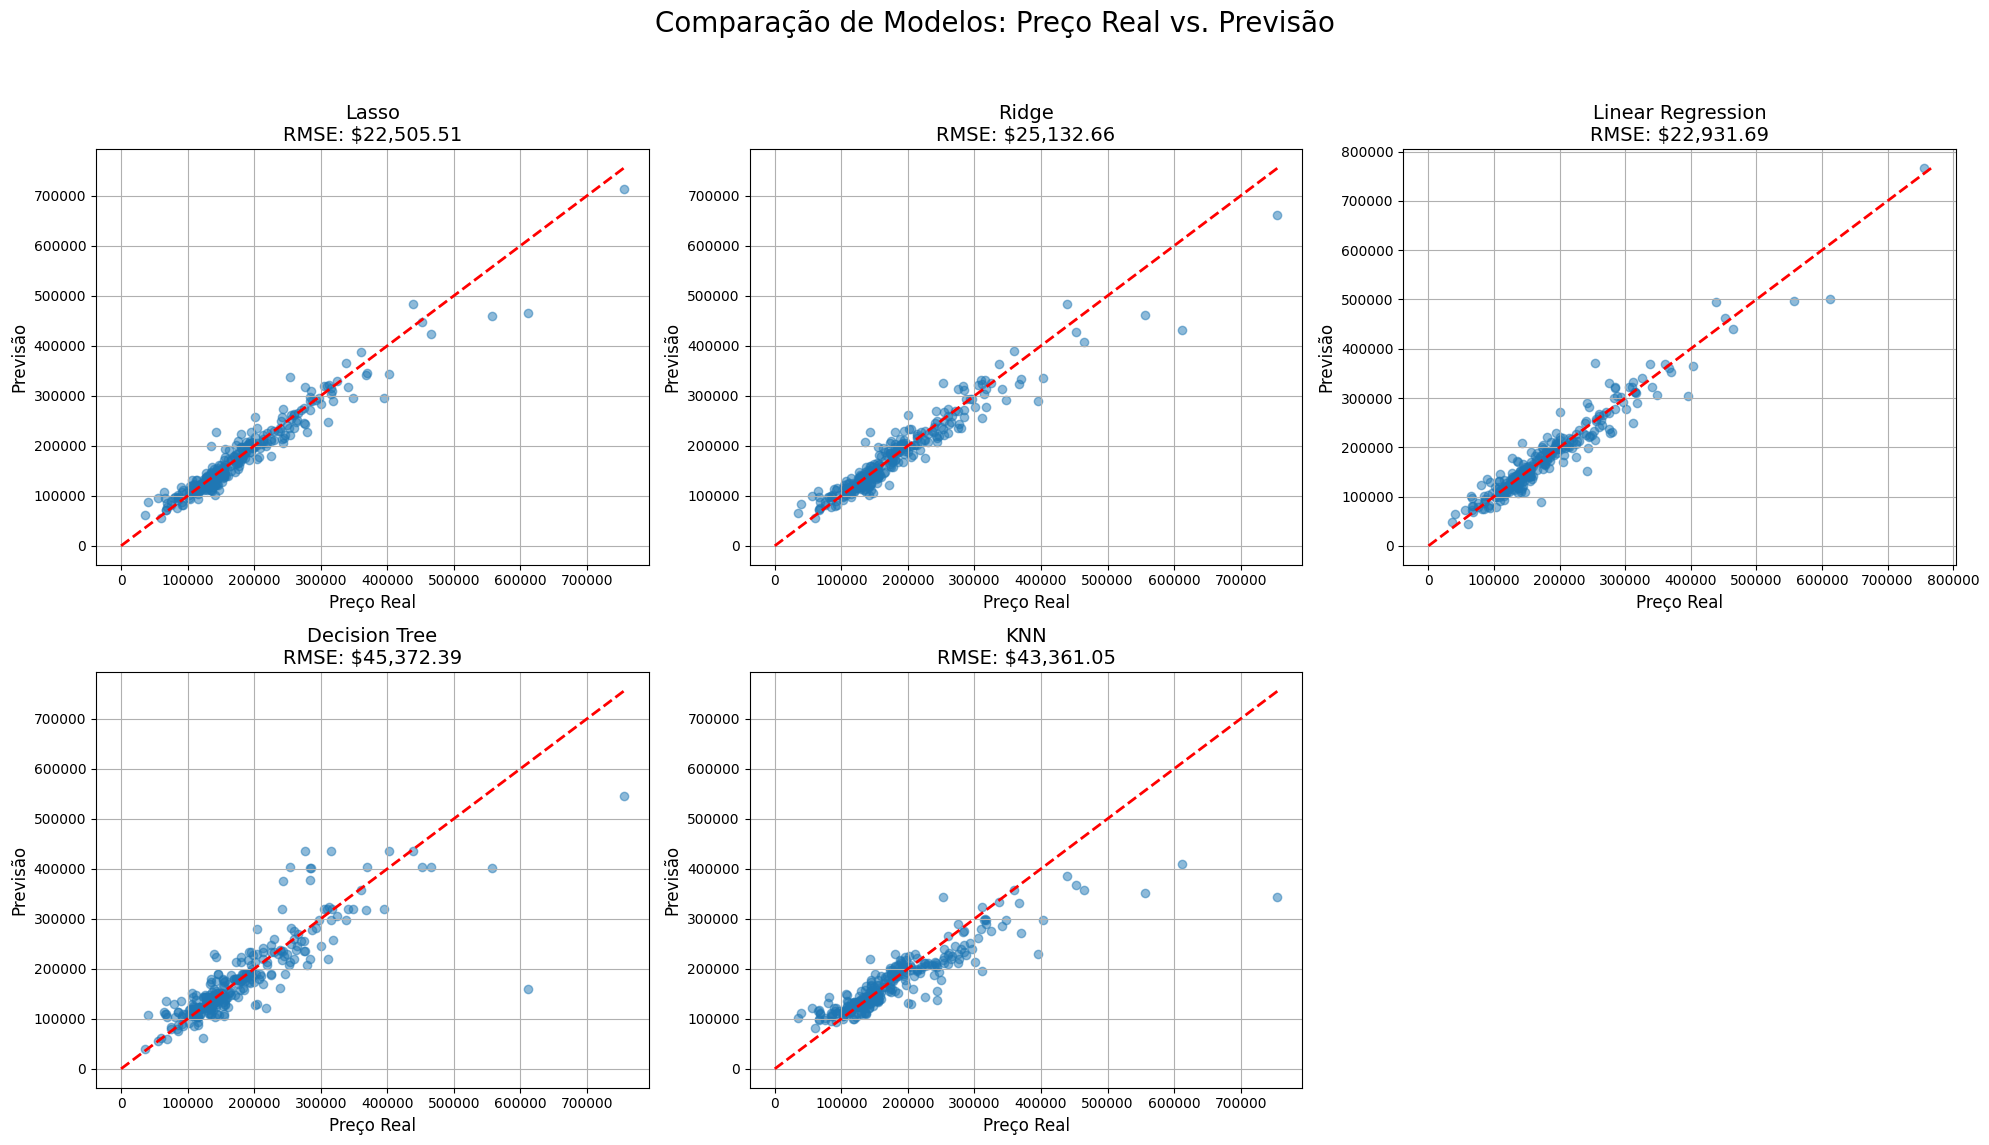

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter y_val de log para a escala real para avaliação
y_val_real = np.expm1(y_val)



models = {}

# 1. Lasso
lasso = Lasso(alpha=0.0005, random_state=42).fit(X_train, y_train)
models['Lasso'] = lasso

# 2. Ridge
ridge = Ridge(alpha=10, random_state=42).fit(X_train, y_train)
models['Ridge'] = ridge

# 3. Regressão Linear
linear_reg = LinearRegression().fit(X_train, y_train)
models['Linear Regression'] = linear_reg

# 4. Árvore de Regressão
# Definimos max_depth para evitar overfitting excessivo
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42).fit(X_train, y_train)
models['Decision Tree'] = tree_reg

# 5. KNN - Requer escalonamento dos dados!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
knn_reg = KNeighborsRegressor(n_neighbors=10).fit(X_train_scaled, y_train)
models['KNN'] = knn_reg


# Criando a figura para os plots (2 linhas, 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Transforma a matriz 2x3 em um array de 6 posições

# Loop para plotar cada modelo
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]

    # KNN usa dados escalados para predição, os outros não
    if name == 'KNN':
        y_pred_log = model.predict(X_val_scaled)
    else:
        y_pred_log = model.predict(X_val)

    y_pred_real = np.expm1(y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))

    # Plot de dispersão (Real vs. Previsto)
    ax.scatter(y_val_real, y_pred_real, alpha=0.5)

    # Linha de predição perfeita (y=x)
    line_max = max(y_val_real.max(), y_pred_real.max())
    ax.plot([0, line_max], [0, line_max], '--', color='red', lw=2)

    # Títulos e labels
    ax.set_title(f'{name}\nRMSE: ${rmse:,.2f}', fontsize=14)
    ax.set_xlabel('Preço Real', fontsize=12)
    ax.set_ylabel('Previsão', fontsize=12)
    ax.grid(True)

# Remove o sexto subplot que ficou vazio
fig.delaxes(axes[5])

fig.suptitle('Comparação de Modelos: Preço Real vs. Previsão', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o título principal
plt.show()


# Validando o Melhor Modelo (Lasso)

In [ ]:
import pandas as pd
import numpy as np


df_test = pd.read_csv('test.csv')
# Guardar os IDs para o ficheiro de submissão final
test_ids = df_test['Id']

print(f"Formato inicial da base de teste: {df_test.shape}")


# 2a. Tratamento de Nulos
# Usamos as medianas do *conjunto de treino* para preencher os nulos do teste
# Assumindo que 'base' é o DataFrame de treino já processado do script anterior
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(base.groupby('Neighborhood')['LotFrontage'].median().get(x.name, base['LotFrontage'].median()))
)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']:
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna('None')

# Preencher nulos numéricos restantes com 0 ou a moda do *treino*
for col in ['MasVnrArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
     if col in df_test.columns:
        df_test[col] = df_test[col].fillna(0)

for col in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']:
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(base[col].mode()[0])


# 2b. Engenharia de Features
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['YearsSinceRemod'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['TotalBath'] = df_test['FullBath'] + 0.5 * df_test['HalfBath'] + df_test['BsmtFullBath'] + 0.5 * df_test['BsmtHalfBath']


# 2c. One-Hot Encoding e Alinhamento de Colunas
X_test = df_test.drop('Id', axis=1)
X_test = pd.get_dummies(X_test)

# 2d: Verificação Final de NaNs (CORREÇÃO)
# Garante que não há nenhum valor nulo antes de passar para o modelo
if X_test.isnull().sum().sum() > 0:
    print(f"Atenção: {X_test.isnull().sum().sum()} NaNs encontrados após o pré-processamento. Preenchendo com 0.")
    X_test.fillna(0, inplace=True)


# ALINHAMENTO: Garante que o X_test tenha exatamente as mesmas colunas que o X_train
# 'X' é o DataFrame de treino final do script anterior
missing_cols = set(X.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
# Garante que a ordem das colunas é a mesma
X_test = X_test[X.columns]

print(f"Formato final da base de teste após pré-processamento: {X_test.shape}")


final_model = lasso

# Fazer previsões na escala de log
log_predictions = final_model.predict(X_test)

# Converter as previsões de volta para a escala de dólares
final_predictions = np.expm1(log_predictions)


submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_predictions
})

# Salvar para um ficheiro .csv
submission.to_csv('submission.csv', index=False)

print("\nFicheiro 'submission.csv' criado com sucesso!")
print("Pode agora submeter este ficheiro no Kaggle.")
submission.head()



Formato inicial da base de teste: (1459, 80)
Atenção: 3 NaNs encontrados após o pré-processamento. Preenchendo com 0.
Formato final da base de teste após pré-processamento: (1459, 306)

Ficheiro 'submission.csv' criado com sucesso!
Pode agora submeter este ficheiro no Kaggle.


,Id,SalePrice
0,1461,116048.988970
1,1462,145341.988452
2,1463,172952.697271
3,1464,195405.223123
4,1465,198699.416513
